In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

validation_data = data[0: 1000].T
y_validation = validation_data[0]
x_validation = validation_data[0: 1000]

train_data = data[1000: m].T
Y_train = train_data[0]
x_train = train_data[1:n]
x_col, x_row = x_train.shape


In [5]:
print(x_col, x_row)
print(x_train[:,0].shape) # first column with 784 pixels
print(x_train.shape)
x_train.shape

784 41000
(784,)
(784, 41000)


(784, 41000)

In [6]:
train_data[0:5]

array([[4, 8, 0, ..., 7, 4, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
def initialize_parameters(inp_dim, hidden_dim, out_dim):
    w1 = np.random.rand(hidden_dim, inp_dim)
    b1 = np.random.rand(hidden_dim, 1)
    
    w2 = np.random.rand(out_dim, hidden_dim)
    b2 = np.random.rand(out_dim, 1)
    return w1, b1, w2, b2

In [8]:
def Relu(x, deriv = False):
    if (deriv == True):
        return x > 0
    else:
        return np.maximum(0, x)

In [9]:
def Softmax(x):
    return np.exp(x)/ np.sum(np.exp(x))

In [10]:
def forward_propagation(x, w1, b1, w2, b2): # x is input layer
    net1 = w1.dot(x) + b1
    out1 = Relu(net1) # output of first hidden layer

    net2 = w2.dot(out1) + b2
    out2 = Softmax(net2) # output at output layer
    return net1, out1, net2, out2

In [11]:
def One_hot(x):
    one_hot_x = np.zeros((x.size, x.max() + 1)) # dummy matrix
    one_hot_x[np.arange(x.size), x] = 1 # it iterates on the dummy matrix and assign 1 to the right label only
    return one_hot_x.T

In [12]:
def backward_propagation(net1, out1, net2, out2, W2, X, Y):
    s = Y.size
    y = One_hot(Y)
    
    # for output layer
    out_error = out2 - y
    delta_w2 = 1 / s * out_error.dot(out1.T)
    delta_b2 = 1 / s * np.sum(out_error)
    
    # for hidden layer
    hidden_layer_error = W2.T.dot(out_error) * Relu(net1, True)
    delta_w1 = 1 / s * hidden_layer_error.dot(X.T)
    delta_b1 = 1 / s * np.sum(hidden_layer_error)
    return delta_w1, delta_b1, delta_w2, delta_b2
    
    

In [13]:
def update_parameters(W1, b1, W2, b2, d_w1, d_b1, d_w2, d_b2, alpha):
    w1 = W1 - alpha * d_w1
    b1 = b1 - alpha * d_b1
    w2 = W2 - alpha * d_w2
    b2 = b2 - alpha * d_b2
    return w1, b1, w2, b2

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [15]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [16]:
def gradient_descent(X, Y, alpha, iterations):
    w1, b1, w2, b2 = initialize_parameters(784, 10, 10)
    for i in range(iterations):
        net1, out1, net2, out2 = forward_propagation(X, w1, b1, w2, b2)
        delta_w1, delta_b1, delta_w2, delta_b2 = backward_propagation(net1, out1, net2, out2, w2, X, Y)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(out2)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2

In [17]:
w1, b1, w2, b2 = gradient_descent(x_train, Y_train, 0.10, 100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Iteration:  0
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  10
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  20
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  30
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  40
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  50
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  60
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  70
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  80
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561
Iteration:  90
[0 0 0 ... 0 0 0] [4 8 0 ... 7 4 1]
0.09875609756097561


In [18]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, output = forward_propagation(x, w1, b1, w2, b2)
    predictions = get_predictions(output)
    return predictions

In [19]:
def test_pred(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("predictions:", prediction)
    print("label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 225
    plt.gray()
    plt.imshow(current_image, interpolation= "nearest")
    plt.show()

predictions: [0]
label:  8


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


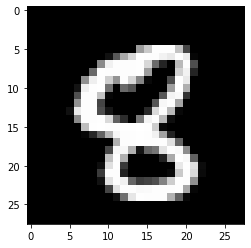

In [20]:
test_pred(1, w1, b1, w2, b2)